In [1]:
# zero_dict = {88:0, 
#             77: np.nan,
#             99: np.nan}

# df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [76]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#Import our Data

In [78]:
df = pd.read_csv('Person_Raw.csv')

In [79]:
#Inspect Our Data

In [80]:
df.columns

Index(['Unnamed: 0', 'popularity', 'known_for_department', 'name', 'id',
       'profile_path', 'adult', 'known_for', 'gender'],
      dtype='object')

In [81]:
df.shape

(10000, 9)

In [82]:
df.head()

,Unnamed: 0,popularity,known_for_department,name,id,profile_path,adult,known_for,gender
0,0,50.359,Acting,Cho Yeo-jeong,556435,/5MgWM8pkUiYkj9MEaEpO0Ir1FD9.jpg,False,[{'poster_path': '/7IiTTgloJzvGI1TAYymCfbfl3vT...,1
1,1,23.507,Acting,Nina Fotaras,2251146,/aL1gFEUlpeDpWjabF1rpfkplS1n.jpg,False,[{'poster_path': '/dqBU63M3cKy7pfVsmhrbgY5X8iv...,1
2,2,57.228,Acting,Thassapak Hsu,1910848,/1fmjgN8EvDj1TiEJk2Zs4y0T40O.jpg,False,"[{'original_name': '萌妻食神', 'genre_ids': [35, 1...",2
3,3,38.399,Acting,Vanda Lee,2487703,/jRdDoFoHq36hg4kYxxiLa5DRYUW.jpg,False,"[{'release_date': '2019-12-20', 'id': 449924, ...",1
4,4,23.451,Acting,Alison Jaye Horowitz,1362223,/iEWtgDu0OweicGOl1rxybzCaota.jpg,False,"[{'original_name': 'Shameless', 'genre_ids': [...",1


In [83]:
#Handle non-normal values

In [84]:
zero_dict = {0:np.nan,
             3:np.nan
            }
df['gender']= df['gender'].replace(zero_dict)

In [85]:
df.shape

(10000, 9)

In [86]:
df.dropna(subset=['gender'], inplace=True)

In [87]:
df.shape

(8272, 9)

In [88]:
df.reset_index(drop=True, inplace = True)

In [89]:
df.shape

(8272, 9)

In [90]:
df.head()

,Unnamed: 0,popularity,known_for_department,name,id,profile_path,adult,known_for,gender
0,0,50.359,Acting,Cho Yeo-jeong,556435,/5MgWM8pkUiYkj9MEaEpO0Ir1FD9.jpg,False,[{'poster_path': '/7IiTTgloJzvGI1TAYymCfbfl3vT...,1.0
1,1,23.507,Acting,Nina Fotaras,2251146,/aL1gFEUlpeDpWjabF1rpfkplS1n.jpg,False,[{'poster_path': '/dqBU63M3cKy7pfVsmhrbgY5X8iv...,1.0
2,2,57.228,Acting,Thassapak Hsu,1910848,/1fmjgN8EvDj1TiEJk2Zs4y0T40O.jpg,False,"[{'original_name': '萌妻食神', 'genre_ids': [35, 1...",2.0
3,3,38.399,Acting,Vanda Lee,2487703,/jRdDoFoHq36hg4kYxxiLa5DRYUW.jpg,False,"[{'release_date': '2019-12-20', 'id': 449924, ...",1.0
4,4,23.451,Acting,Alison Jaye Horowitz,1362223,/iEWtgDu0OweicGOl1rxybzCaota.jpg,False,"[{'original_name': 'Shameless', 'genre_ids': [...",1.0


In [91]:
df.columns

Index(['Unnamed: 0', 'popularity', 'known_for_department', 'name', 'id',
       'profile_path', 'adult', 'known_for', 'gender'],
      dtype='object')

In [92]:
df.set_index(['name'], inplace = True)

In [93]:
df = df.drop(columns=['Unnamed: 0', 'profile_path', 'adult'])

In [94]:
df.head(10)

,popularity,known_for_department,id,known_for,gender
name,,,,,
Cho Yeo-jeong,50.359,Acting,556435,[{'poster_path': '/7IiTTgloJzvGI1TAYymCfbfl3vT...,1.0
Nina Fotaras,23.507,Acting,2251146,[{'poster_path': '/dqBU63M3cKy7pfVsmhrbgY5X8iv...,1.0
Thassapak Hsu,57.228,Acting,1910848,"[{'original_name': '萌妻食神', 'genre_ids': [35, 1...",2.0
Vanda Lee,38.399,Acting,2487703,"[{'release_date': '2019-12-20', 'id': 449924, ...",1.0
Alison Jaye Horowitz,23.451,Acting,1362223,"[{'original_name': 'Shameless', 'genre_ids': [...",1.0
Scarlett Johansson,23.557,Acting,1245,"[{'release_date': '2012-04-25', 'id': 24428, '...",1.0
Henry Cavill,19.305,Acting,73968,[{'poster_path': '/cGOPbv9wA5gEejkUN892JrveARt...,2.0
Yoo Sul-young,21.709,Acting,2093355,"[{'vote_count': 1, 'id': 538335, 'video': Fals...",1.0
Kirara Asuka,31.180,Acting,1204384,[{'poster_path': '/4iO4onZi4Rbr6sV1EvUqf9QD2i4...,1.0


In [95]:
df.describe

<bound method NDFrame.describe of                       popularity known_for_department       id  \
name                                                             
Cho Yeo-jeong             50.359               Acting   556435   
Nina Fotaras              23.507               Acting  2251146   
Thassapak Hsu             57.228               Acting  1910848   
Vanda Lee                 38.399               Acting  2487703   
Alison Jaye Horowitz      23.451               Acting  1362223   
...                          ...                  ...      ...   
Steffinnie Phrommany       1.608               Acting  1562397   
Kim Ye-won                 1.565               Acting  1547202   
Lee Joo-hyung              0.600               Acting  1537955   
Joakhim Sigue              1.400               Acting  1530933   
Atesh Salih                1.960               Acting  1529025   

                                                              known_for  \
name                            

In [96]:
df = df[(df['popularity'] <=30)]

In [97]:
#Generate Descriptive Statistics

In [98]:
df['popularity'].describe()

count    8268.000000
mean        2.212376
std         2.022436
min         0.600000
25%         0.980000
50%         1.640000
75%         2.715000
max        27.758000
Name: popularity, dtype: float64

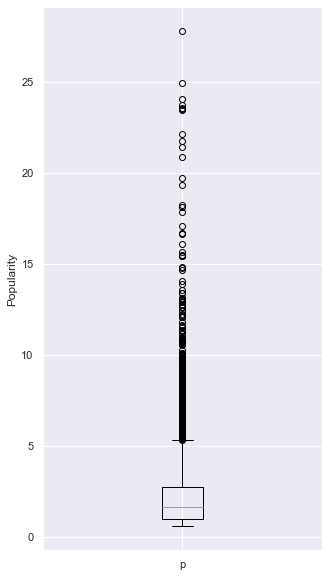

In [99]:
fig, ax = plt.subplots(figsize=(5,10))

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['popularity'])

# Add x-axis tick labels:
ax.set_xticklabels('popularity')

# Add a y-axis label
ax.set_ylabel("Popularity")

plt.show()


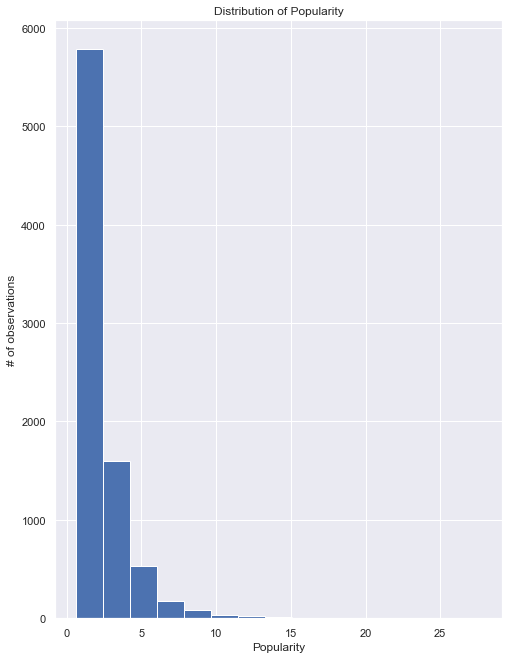

In [100]:
# graphic showing the histogram of data
fig, ax = plt.subplots(figsize=(8.,11))
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['popularity'], bins=15)

ax.set_xlabel('Popularity')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Popularity")

plt.show()

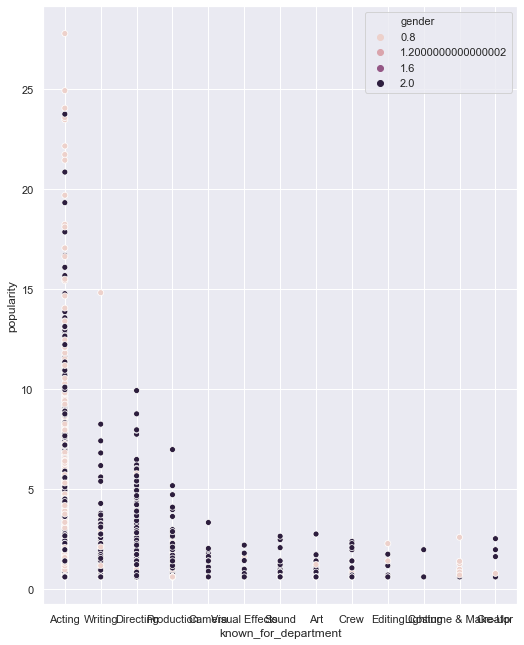

In [101]:
plt.figure(figsize=(8.5, 11))
sns.set()

sns.scatterplot(df['known_for_department'], df['popularity'], hue= df['gender'])

In [103]:
df.groupby('gender')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1.0,3763.0,2.374724,2.203916,0.6,1.094,1.755,2.904,27.758
2.0,4505.0,2.076768,1.846645,0.6,0.840,1.566,2.588,23.731


In [104]:
gender_means = df.groupby('gender')['popularity'].mean().values
df.groupby('gender')['popularity'].mean()
gender = ['Female', 'Male']

Text(0.5, 1.0, 'Comparing Popularity by Gender')

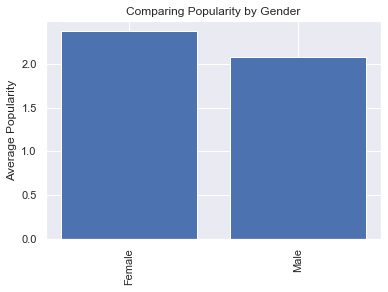

In [105]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(gender, gender_means)

# Set labels and title
ax.set_xticklabels(['Female', 'Male'], rotation=90)
ax.set_ylabel('Average Popularity')
ax.set_title('Comparing Popularity by Gender')

In [ ]:
#Explore Known for

In [108]:
df['known_for_department'].unique()

array(['Acting', 'Writing', 'Directing', 'Production', 'Camera',
       'Visual Effects', 'Sound', 'Art', 'Crew', 'Editing', 'Lighting',
       'Costume & Make-Up', 'Creator'], dtype=object)

In [106]:
dfk = df.groupby(['gender', 'known_for_department'])['popularity']

In [107]:
dfk.describe()

count      mean       std    min      25%  \
gender known_for_department                                               
1.0    Acting                3634.0  2.413997  2.216467  0.600  1.13025   
       Art                      2.0  0.910000  0.438406  0.600  0.75500   
       Camera                   1.0  0.600000       NaN  0.600  0.60000   
       Costume & Make-Up        6.0  1.289167  0.682181  0.694  0.87500   
       Creator                  1.0  0.774000       NaN  0.774  0.77400   
       Crew                     3.0  0.676000  0.131636  0.600  0.60000   
       Directing               40.0  1.184300  0.949460  0.600  0.60000   
       Editing                  2.0  1.834000  0.613769  1.400  1.61700   
       Production              20.0  1.187150  0.717112  0.600  0.60000   
       Sound                    5.0  0.624400  0.034012  0.600  0.60000   
       Visual Effects           1.0  1.628000       NaN  1.628  1.62800   
       Writing                 48.0  1.481917  2.094650  0.600  0.60000   
2.0    Acting                3657.0  2.208110  1.939896  0.600  0.98000   
       Art                     20.0  1.035400  0.564578  0.600  0.60000   
       Camera                  17.0  1.294824  0.733904  0.600  0.60000   
       Costume & Make-Up        1.0  0.600000       NaN  0.600  0.60000   
       Creator                  5.0  1.457000  0.845203  0.600  0.60000   
       Crew                    18.0  1.238667  0.605227  0.600  0.62350   
       Directing              360.0  1.684633  1.427370  0.600  0.65575   
       Editing                  6.0  0.899333  0.465206  0.600  0.60000   
       Lighting                 3.0  1.053333  0.785196  0.600  0.60000   
       Production              65.0  1.530385  1.284023  0.600  0.60000   
       Sound                   27.0  1.020852  0.573585  0.600  0.60000   
       Visual Effects          10.0  1.014600  0.583079  0.600  0.60000   
       Writing                316.0  1.441997  1.068108  0.600  0.60000   

                                50%      75%     max  
gender known_for_department                           
1.0    Acting                1.7880  2.96325  27.758  
       Art                   0.9100  1.06500   1.220  
       Camera                0.6000  0.60000   0.600  
       Costume & Make-Up     1.1205  1.35025   2.580  
       Creator               0.7740  0.77400   0.774  
       Crew                  0.6000  0.71400   0.828  
       Directing             0.8555  1.38500   5.759  
       Editing               1.8340  2.05100   2.268  
       Production            0.9750  1.45500   2.787  
       Sound                 0.6000  0.65200   0.670  
       Visual Effects        1.6280  1.62800   1.628  
       Writing               0.7965  1.66525  14.805  
2.0    Acting                1.6700  2.73600  23.731  
       Art                   0.8400  1.40000   2.744  
       Camera                1.3930  1.62000   3.320  
       Costume & Make-Up     0.6000  0.60000   0.600  
       Creator               1.6140  1.96000   2.511  
       Crew                  1.2260  1.40000   2.373  
       Directing             1.3490  1.96700   9.913  
       Editing               0.6470  1.04800   1.736  
       Lighting              0.6000  1.28000   1.960  
       Production            1.0480  1.96000   6.964  
       Sound                 0.8400  1.22000   2.634  
       Visual Effects        0.6830  1.31000   2.188  
       Writing               1.1035  1.85675   8.235

In [113]:
#Create df for actors
dfa = df.loc[(df['known_for_department'] == 'Acting')]


In [114]:
# new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]



In [125]:
dfa.sort_values(['popularity'], ascending = False, inplace = True)

/Users/ellis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
dfa.describe()

,popularity,id,gender
count,7291.000000,7.291000e+03,7291.000000
mean,2.310729,4.581076e+05,1.501577
std,2.084743,6.375870e+05,0.500032
min,0.600000,2.000000e+00,1.000000
25%,1.048000,2.113050e+04,1.000000
50%,1.719000,8.314900e+04,2.000000
75%,2.837500,1.038818e+06,2.000000
max,27.758000,2.531077e+06,2.000000


In [127]:
dfa.head()

,popularity,known_for_department,id,known_for,gender
name,,,,,
Taliah Webster,27.758,Acting,1823853,"[{'release_date': '2017-08-11', 'id': 429200, ...",1.0
Saori Hara,24.905,Acting,122158,[{'poster_path': '/dEb0Kb0xmUuHmO1Dk4WKHuaw5Cw...,1.0
Karen Gillan,24.030,Acting,543261,[{'poster_path': '/y31QB9kn3XSudA15tV7UWQ9XLuW...,1.0
Brad Pitt,23.731,Acting,287,"[{'release_date': '1999-10-15', 'id': 550, 'vo...",2.0
Scarlett Johansson,23.557,Acting,1245,"[{'release_date': '2012-04-25', 'id': 24428, '...",1.0


In [118]:
#Create DF for Directos
dfd = df.loc[(df['known_for_department']== 'Directing')]

In [119]:
dfd.describe()

,popularity,id,gender
count,400.000000,4.000000e+02,400.000000
mean,1.634600,2.521082e+05,1.900000
std,1.394215,4.565622e+05,0.300376
min,0.600000,1.000000e+00,1.000000
25%,0.608000,1.295775e+04,2.000000
50%,1.255500,5.860750e+04,2.000000
75%,1.960000,1.469720e+05,2.000000
max,9.913000,2.358572e+06,2.000000


In [120]:
dfd.head()

,popularity,known_for_department,id,known_for,gender
name,,,,,
Quentin Tarantino,7.732,Directing,138,[{'poster_path': '/d5iIlFn5s0ImszYzBPb8JPIfbXD...,2.0
Bong Joon-ho,9.913,Directing,21684,"[{'release_date': '2013-08-01', 'id': 110415, ...",2.0
Taika Waititi,8.750,Directing,55934,[{'poster_path': '/rzRwTcFvttcN1ZpX2xv4j3tSdJu...,2.0
Steven Spielberg,7.928,Directing,488,[{'poster_path': '/c414cDeQ9b6qLPLeKmiJuLDUREJ...,2.0
Fritz Lang,2.459,Directing,68,[{'poster_path': '/qriaeUUwdmlgethK3aSAx68mG05...,2.0


In [123]:
dfd.sort_values(['popularity'], ascending = False, inplace = True)

/Users/ellis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
dfd.head()

,popularity,known_for_department,id,known_for,gender
name,,,,,
Bong Joon-ho,9.913,Directing,21684,"[{'release_date': '2013-08-01', 'id': 110415, ...",2.0
Taika Waititi,8.750,Directing,55934,[{'poster_path': '/rzRwTcFvttcN1ZpX2xv4j3tSdJu...,2.0
Jon Favreau,7.952,Directing,15277,[{'poster_path': '/848chlIWVT41VtAAgyh9bWymAYb...,2.0
Steven Spielberg,7.928,Directing,488,[{'poster_path': '/c414cDeQ9b6qLPLeKmiJuLDUREJ...,2.0
Quentin Tarantino,7.732,Directing,138,[{'poster_path': '/d5iIlFn5s0ImszYzBPb8JPIfbXD...,2.0


In [128]:
gender_means_dir = dfd.groupby('gender')['popularity'].mean().values
dfd.groupby('gender')['popularity'].mean()
gender = ['Female', 'Male']

Text(0.5, 1.0, 'Comparing Popularity by Gender')

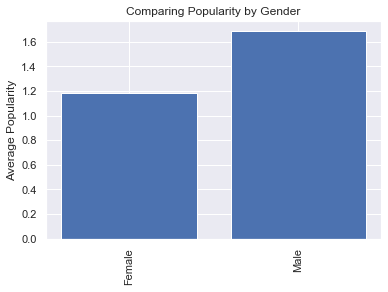

In [129]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(gender, gender_means_dir)

# Set labels and title
ax.set_xticklabels(['Female', 'Male'], rotation=90)
ax.set_ylabel('Average Popularity')
ax.set_title('Comparing Popularity by Gender')

In [138]:
dfd.groupby('gender')['popularity', 'gender'].head(20)

,popularity,gender
name,,
Bong Joon-ho,9.913,2.0
Taika Waititi,8.750,2.0
Jon Favreau,7.952,2.0
Steven Spielberg,7.928,2.0
Quentin Tarantino,7.732,2.0
Christopher Nolan,6.470,2.0
Martin Scorsese,6.194,2.0
Guy Ritchie,6.025,2.0
Ridley Scott,5.988,2.0


In [136]:
dfd.describe()

,popularity,id,gender
count,400.000000,4.000000e+02,400.000000
mean,1.634600,2.521082e+05,1.900000
std,1.394215,4.565622e+05,0.300376
min,0.600000,1.000000e+00,1.000000
25%,0.608000,1.295775e+04,2.000000
50%,1.255500,5.860750e+04,2.000000
75%,1.960000,1.469720e+05,2.000000
max,9.913000,2.358572e+06,2.000000
